In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
KPSS_data = pd.read_csv("KPSS_2022.csv")
cpc_data = pd.read_csv("Match_patent_cpc_2022.csv")

# merge the two data sets
merge_KPSS_cpc = KPSS_data.merge(cpc_data, how="left", on="patent_num")
#merge_KPSS_cpc.to_csv("merged_KPSS_cpc.csv")

In [3]:
# replace dates with just the year for plotting
KPSS_data["issue_date"] = KPSS_data["issue_date"].astype(str).str[:4]
KPSS_data["filing_date"] = KPSS_data["filing_date"].astype(str).str[:4]

# convert back to integer values
KPSS_data['issue_date'] = pd.to_numeric(KPSS_data['issue_date'])
KPSS_data['filing_date'] = pd.to_numeric(KPSS_data['filing_date'], errors='coerce')

# some filing dates have NaN values -> dropping them from the dataset
KPSS_data_clean = KPSS_data.dropna(subset=['filing_date', 'xi_nominal', 'xi_real', 'cites'])

In [18]:
cpc_columns = merge_KPSS_cpc['cpc'].str.split(';')
cpc_columns

0                                                 [F23K3/12]
1                                     [F41A19/49, F41A19/15]
2          [E05F5/025, Y10T16/628, Y10T16/6285, E05Y2900/...
3                                                [B60P3/073]
4                                                [H04L17/24]
                                 ...                        
3160448    [H04W48/16, H04W48/20, H04W72/0406, H04W84/12,...
3160449       [H04W16/32, H04W76/10, H04L41/0803, H04W48/16]
3160450       [H04W48/16, H04L1/0009, H04L5/0053, H04W76/10]
3160451                  [H04W16/28, H04W56/001, H04B7/0697]
3160452    [G03G21/1807, G03G2221/1884, G03G15/0178, G03G...
Name: cpc, Length: 3160453, dtype: object

In [21]:
# split long format (multiple rows for each cpc)
long_merge = merge_KPSS_cpc
long_merge['cpc'] = merge_KPSS_cpc['cpc'].str.split(';')
long_merge = merge_KPSS_cpc.explode('cpc').reset_index(drop=True)
#long_merge.to_csv('long_merg.csv')

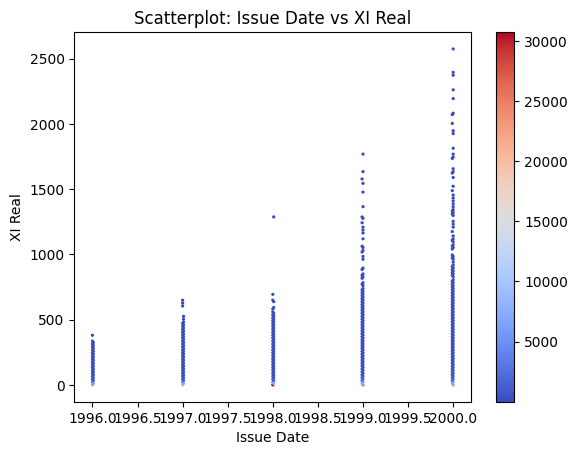

In [51]:
# visualization of KPSS data
# relationship between date and value of innovation
KPSS_data_10 = KPSS_data_clean.sort_values(by='issue_date')
KPSS_data_10 = KPSS_data_10[(KPSS_data_10['issue_date'] > 1995) & (KPSS_data_10['issue_date'] < 2001)]
x = KPSS_data_10.issue_date
y = KPSS_data_10.xi_real

# Create a hexbin plot
plt.hexbin(x, y, gridsize=200, cmap='coolwarm', mincnt=0.1)

plt.title("Scatterplot: Issue Date vs XI Real")
plt.xlabel("Issue Date")
plt.ylabel("XI Real")

plt.colorbar()
plt.show()

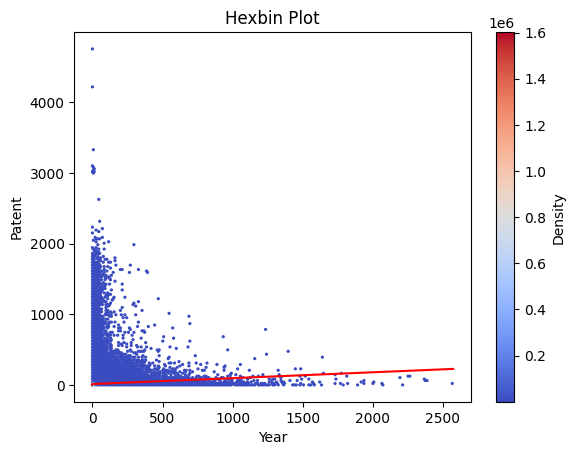

In [7]:
# load data into a DataFrame or use an existing one
x = KPSS_data.xi_real
y = KPSS_data.cites

# create a hexbin plot
plt.hexbin(x, y, gridsize=200, cmap='coolwarm', mincnt=0.1)

# calculate the coefficients of the line of best fit
coefficients = np.polyfit(x, y, 1)
line_of_best_fit = np.poly1d(coefficients)

# generate x-values for the line of best fit
x_values = np.linspace(x.min(), x.max(), 100)

# line of best fit
plt.plot(x_values, line_of_best_fit(x_values), color='red')

# set labels and title
plt.xlabel('Cites')
plt.ylabel('XI_real')
plt.title('Hexbin Plot')

# create density scale
plt.colorbar(label='Density')

plt.show()

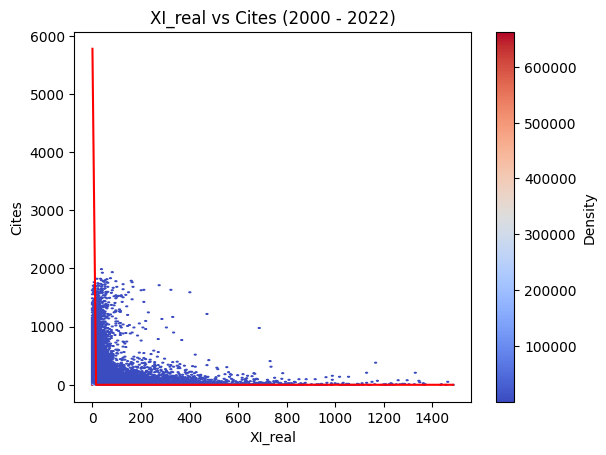

In [6]:

# get the last 10 years
KPSS_data_10 = KPSS_data_clean.sort_values(by='issue_date')
KPSS_data_10 = KPSS_data_10[KPSS_data_10['issue_date'] > 2000]
KPSS_data_10 = KPSS_data_10[KPSS_data_10['cites'] < 2000]
KPSS_data_10 = KPSS_data_10[KPSS_data_10['xi_real'] < 1500]

# load data into a DataFrame or use an existing one
x = KPSS_data_10.xi_real
y = KPSS_data_10.cites

# create a hexbin plot
plt.hexbin(x, y, gridsize=200, cmap='coolwarm', mincnt=0.1)

# generate x-values
x_line = np.linspace(x.min(), x.max(), 100)

# calculate y-values using the equation y = 1/x
y_line = 1 / x_line

# line of best fit
plt.plot(x_line, y_line, color='red')

# set labels and title
plt.xlabel('XI_real')
plt.ylabel('Cites')
plt.title('XI_real vs Cites (2000 - 2022)')

# create the density scale
plt.colorbar(label='Density')

plt.show()

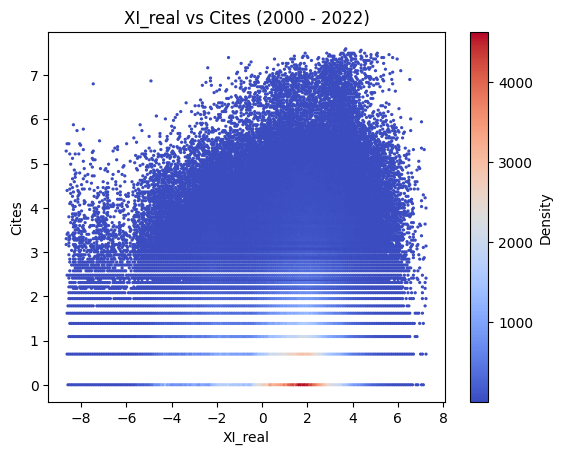

In [10]:
# take the natural logarithm of x and y
x_log = np.log(x)
y_log = np.log(y)

# create a hexbin plot with the transformed data
plt.hexbin(x_log, y_log, gridsize=200, cmap='coolwarm', mincnt=0.1)

# generate x-values for the line of best fit
x_line = np.linspace(x_log.min(), x_log.max(), 100)

# linear regression line to the transformed data
slope, intercept = np.polyfit(x_log, y_log, deg=1)

# y-values for the line of best fit in the original scale
y_line = np.exp(slope * x_line + intercept)

# line of best fit
plt.plot(np.exp(x_line), y_line, color='red')

# set labels and title
plt.xlabel('XI_real')
plt.ylabel('Cites')
plt.title('XI_real vs Cites (2000 - 2022)')

# create density scale
plt.colorbar(label='Density')

plt.show()

In [20]:
cpc_counts = long_merge['cpc'].value_counts()
cpc_counts = cpc_counts.to_frame()
cpc_counts.to_csv("cpc_counts.csv")

NameError: name 'long_merge' is not defined

In [42]:
# count the number of occurences in each cpc
cpc_counts = pd.read_csv("cpc_counts.csv")
cpc_categories = cpc_counts['cpc'].astype(str).str[:4]
cpc_categories = cpc_categories.to_frame()
cpc_categories_count = cpc_categories['cpc'].value_counts()

# get top 10 frequent cpc's in data
cpc_categories_count[::][:10]


cpc
Y10T    9137
H01L    6574
Y10S    5433
G05B    4981
B29C    3894
C07C    3445
A61B    3392
G01N    3351
G06F    3301
H04N    3082
Name: count, dtype: int64

In [24]:
long_merge_count = long_merge['patent_num'].value_counts()
long_merge_count

patent_num
7995091    342
7562145    312
7801222    286
9612615    285
8397269    252
          ... 
5689816      1
5689813      1
5689810      1
5689808      1
6781687      1
Name: count, Length: 3160453, dtype: int64

In [55]:
#long_merge['cpc'] = long_merge['cpc'].astype(str).str[:4]
sorted_df = merge_KPSS_cpc.nlargest(10, 'xi_nominal')

sorted_df[['patent_num', 'xi_nominal','xi_real','cpc']]


,patent_num,xi_nominal,xi_real,cpc
3068436,11195331,6305.390009,2207.322992,"[G06T2207/20084, G06T17/30, G06T7/40, G06T2207..."
3076707,11227448,5424.068363,1783.673933,"[G06T19/20, G06T2219/024]"
1321011,6094708,4588.502127,2573.780504,"[G06F12/0813, G06F12/0811, G06F12/0888]"
3129111,11424000,4516.470968,1485.215708,"[G11C29/32, G06F9/30101, G06F9/30134, G11C29/16]"
3122788,11398047,4432.534826,1457.613787,"[G06T7/70, G06F9/3877, G06T15/005, G06T19/006]"
3049339,11120609,4397.230359,1539.335023,"[H04N19/513, H04N19/182, G06T15/503, G06T15/20..."
3156625,11526644,4356.187067,1432.507262,"[G06F2115/02, G06F30/323, G06F30/394, G06F2115..."
1315941,6075769,4262.967505,2391.181773,"[Y02D50/10, H04L47/28, H04L47/263, H04L47/22, ..."
1324621,6104717,4242.408891,2379.650045,"[H04L63/0254, H04L61/2517, H04L29/12924, H04L6..."
1322249,6097718,4218.476674,2366.225996,[H04L45/02]


In [59]:
# Convert TSV to CSV
# Read the TSV file into a DataFrame
df = pd.read_csv('g_wipo_technology.tsv', sep='\t')

# Write the DataFrame to a CSV file
df.to_csv('g_wipo_technology.csv', index=False)

In [60]:
ipc_df = pd.read_csv('g_ipc_at_issue.csv')
ipc_df

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_47405/2475790551.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ipc_df = pd.read_csv('g_ipc_at_issue.csv')


,patent_id,ipc_sequence,classification_level,section,ipc_class,subclass,main_group,subgroup,classification_value,classification_status,classification_data_source,action_date,ipc_version_indicator
0,6864832,0,NaN,G,01,S,013,/42,NaN,NaN,NaN,NaN,NaN
1,9954111,8,A,H,01,L,27,1156,I,B,H,2018-04-24,2017-01-01
2,10048897,7,A,G,06,F,12,891,I,B,H,2018-08-14,2016-01-01
3,10694566,0,A,H,4,W,4,0,I,B,H,2020-06-23,2018-01-01
4,11252132,2,A,H,4,L,29,6,I,B,H,2022-02-15,2006-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21492008,9131853,1,A,A,61,B,18,04,I,B,H,2015-09-15,2006-01-01
21492009,11449040,5,A,H,1,L,21,677,I,B,H,2022-09-20,2006-01-01
21492010,4242653,0,NaN,H,03,H,9,30,NaN,NaN,NaN,NaN,NaN
21492011,8658714,0,A,C,08,K,3,08,I,B,H,2014-02-25,2006-01-01


In [7]:
# merge wipo with KPSS data
wipo_df = pd.read_csv('g_wipo_technology.csv')
wipo_df = wipo_df.rename(columns={'patent_id':'patent_num'})
merge_wipo_KPSS = wipo_df.merge(merge_KPSS_cpc,how='inner', on='patent_num')

merge_wipo_KPSS.to_csv("merged_KPSS_wipo.csv")

In [58]:
# get all electrical engineering wipo rows and find number of subcategories
electrical_wipo = merge_wipo_KPSS[merge_wipo_KPSS['wipo_sector_title'] == 'Electrical engineering']
electrical_wipo.rename(columns={'wipo_field_title':'Electical Engineering Subcategories'}, inplace=True)
electrical_categories = electrical_wipo['Electical Engineering Subcategories'].value_counts().to_frame()
electrical_categories.rename(columns={'count':' Electrical Subcategories Count'}, inplace=True)
#electrical_categories.to_csv('electrical_subcategories.csv')

# get all chemistry wipo rows
chemistry_wipo = merge_wipo_KPSS[merge_wipo_KPSS['wipo_sector_title'] == 'Chemistry']
chemistry_wipo.rename(columns={'wipo_field_title':'Chemistry Subcategories'}, inplace=True)
chemistry_categories = chemistry_wipo['Chemistry Subcategories'].value_counts().to_frame()
chemistry_categories.rename(columns={'count':' Chemistry Subcategories Count'}, inplace=True)
#chemistry_categories.to_csv('chemistry_subcategories.csv')

# get all instrument wipo rows
instrument_wipo = merge_wipo_KPSS[merge_wipo_KPSS['wipo_sector_title'] == 'Instruments']
instrument_wipo.rename(columns={'wipo_field_title':'Instruments Subcategories'}, inplace=True)
instrument_categories = instrument_wipo['Instruments Subcategories'].value_counts().to_frame()
instrument_categories.rename(columns={'count':' Instrument Subcategories Count'}, inplace=True)
#instrument_categories.to_csv('intrument_subcategories.csv')

# get all mechanical engineering wipo rows
mechanical_wipo = merge_wipo_KPSS[merge_wipo_KPSS['wipo_sector_title'] == 'Mechanical engineering']
mechanical_wipo.rename(columns={'wipo_field_title':'Mechanical Engineering Subcategories'}, inplace=True)
mechanical_categories = mechanical_wipo['Mechanical Engineering Subcategories'].value_counts().to_frame()
mechanical_categories.rename(columns={'count':' Mechanical Subcategories Count'}, inplace=True)
#mechanical_categories.to_csv('mechanical_subcategories.csv')

# get all other fields wipo rows
other_wipo = merge_wipo_KPSS[merge_wipo_KPSS['wipo_sector_title'] == 'Other fields']
other_wipo.rename(columns={'wipo_field_title':'Other Fields Subcategories'}, inplace=True)
other_categories = other_wipo['Other Fields Subcategories'].value_counts().to_frame()
other_categories.rename(columns={'count':' Other Subcategories Count'}, inplace=True)
#other_categories.to_csv('other_subcategories.csv')

# merge all dfs
merged_df = pd.concat([electrical_categories, chemistry_categories, instrument_categories, mechanical_categories, other_categories], axis=1)
#merged_df.to_csv('all_wipo_subcategories.csv')
#electrical_categories.to_csv('wipo_subcategories.csv')
merged_df

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_62561/2599550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrical_wipo.rename(columns={'wipo_field_title':'Electical Engineering Subcategories'}, inplace=True)
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_62561/2599550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chemistry_wipo.rename(columns={'wipo_field_title':'Chemistry Subcategories'}, inplace=True)
/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_62561/2599550.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,Electrical Subcategories Count,Chemistry Subcategories Count,Instrument Subcategories Count,Mechanical Subcategories Count,Other Subcategories Count
Computer technology,516521.0,NaN,NaN,NaN,NaN
Digital communication,339523.0,NaN,NaN,NaN,NaN
Audio-visual technology,215311.0,NaN,NaN,NaN,NaN
Semiconductors,190221.0,NaN,NaN,NaN,NaN
"Electrical machinery, apparatus, energy",189618.0,NaN,NaN,NaN,NaN
Telecommunications,181264.0,NaN,NaN,NaN,NaN
Basic communication processes,92174.0,NaN,NaN,NaN,NaN
IT methods for management,77869.0,NaN,NaN,NaN,NaN
Organic fine chemistry,NaN,111639.0,NaN,NaN,NaN
Basic materials chemistry,NaN,89723.0,NaN,NaN,NaN


In [5]:
# merge IPC data with KPSS
IPC_data = pd.read_csv('g_ipc_at_issue.csv')
IPC_data.rename(columns={"patent_id": "patent_num"}, inplace=True)

# convert IPC column from object type to int64 type
IPC_data['patent_num'] = pd.to_numeric(IPC_data['patent_num'], errors='coerce')
IPC_data = IPC_data.dropna(subset=['patent_num'])
merge_IPC = merge_KPSS_cpc.merge(IPC_data, how="inner", on="patent_num")
merge_IPC.to_csv("merged_KPSS_ipc.csv")

/var/folders/l4/cvkp09f96k94dvw8pxfwl83c0000gn/T/ipykernel_70915/1457723812.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  IPC_data = pd.read_csv('g_ipc_at_issue.csv')


In [66]:
ipc_section_count = IPC_data['section'].value_counts()
ipc_section_count.to_csv("ipc_section_count.csv")

# get number of classes
ipc_class_count = IPC_data['ipc_class'].value_counts()
ipc_class_count.to_csv("ipc_class_count.csv")

# get number of subclasses
ipc_subclass_count = IPC_data['subclass'].value_counts()
ipc_subclass_count.to_csv("ipc_subclass_count.csv")

# get number of groups
ipc_group_count = IPC_data['main_group'].value_counts()
ipc_group_count.to_csv("ipc_group_count.csv")

# get number of subgroups
ipc_subgroup_count = IPC_data['subgroup'].value_counts()
ipc_subgroup_count.to_csv("ipc_subgroup_count.csv")

In [14]:
UPSC_data = pd.read_csv('g_uspc_at_issue.csv')
# get number of mainclass id's
uspc_mainclass_id_count = UPSC_data['uspc_mainclass_id'].value_counts()
uspc_mainclass_id_count.to_csv("uspc_mainclass_id_count.csv")

# check if title is same number
uspc_mainclass_title_count = UPSC_data['uspc_mainclass_title'].value_counts()
uspc_mainclass_title_count.to_csv("uspc_mainclass_title_count.csv")

# get number of subclasses
uspc_subclass_id_count = UPSC_data['uspc_subclass_id'].value_counts()
uspc_subclass_id_count.to_csv("uspc_subclass_id_count.csv")

uspc_subclass_title_count = UPSC_data['uspc_subclass_title'].value_counts()
uspc_subclass_title_count.to_csv("uspc_subclass_title_count.csv")